In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import outliers_influence

# this allows plots to appear directly in the notebook
%matplotlib inline

data = pd.read_csv('Boston.csv', delimiter=",")

data.head()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [210]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [122]:

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ MV', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.17e-19
Time:                        22:11:44   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.000       9.961      13.632
MV            -0.3632      0.038     -9.460      0.000      -0.439      -0.288
==============================================================================
Omnibus:                      558.880   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32740.044
Skew:                           5.108   Prob(JB):                         0.00
Kurtosis:                      41.059   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ C(CHAS)', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sun, 06 Nov 2016   Prob (F-statistic):              0.209
Time:                        22:11:44   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7444      0.396      9.453      0.000       2.966       4.523
C(CHAS)[T.1]    -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ ZN  + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.57e-56
Time:                        22:11:44   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.0332      7.235      2.354      0.019       2.818      31.248
C(CHAS)[T.1]    -0.7491      1.180     -0.635      0.526      -3.068       1.570
ZN               0.0449      0.019      2.394      0.017       0.008       0.082
INDUS           -0.0639      0.083     -0.766      0.444      -0.228       0.100
NOX            -10.3135      5.276     -1.955      0.051     -20.679       0.052
RM               0.4301      0.613      0.702      0.483      -0.774       1.634
AGE              0.0015      0.018      0.081      0.935      -0.034       0.037
DIS             -0.9872      0.282     -3.503      0.001      -1.541      -0.433
RAD              0.5882      0.088      6.680      0.000       0.415       0.761
TAX             -0.0038      0.005     -0.733      0.464      -0.014       0.006
PT              -0.2711      0.186     -1.454      0.147      -0.637       0.095
B               -0.0075      0.004     -2.052      0.041      -0.015      -0.000
LSTAT            0.1262      0.076      1.667      0.096      -0.023       0.275
MV              -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PT', u'B', u'LSTAT', u'MV'],
      dtype='object')

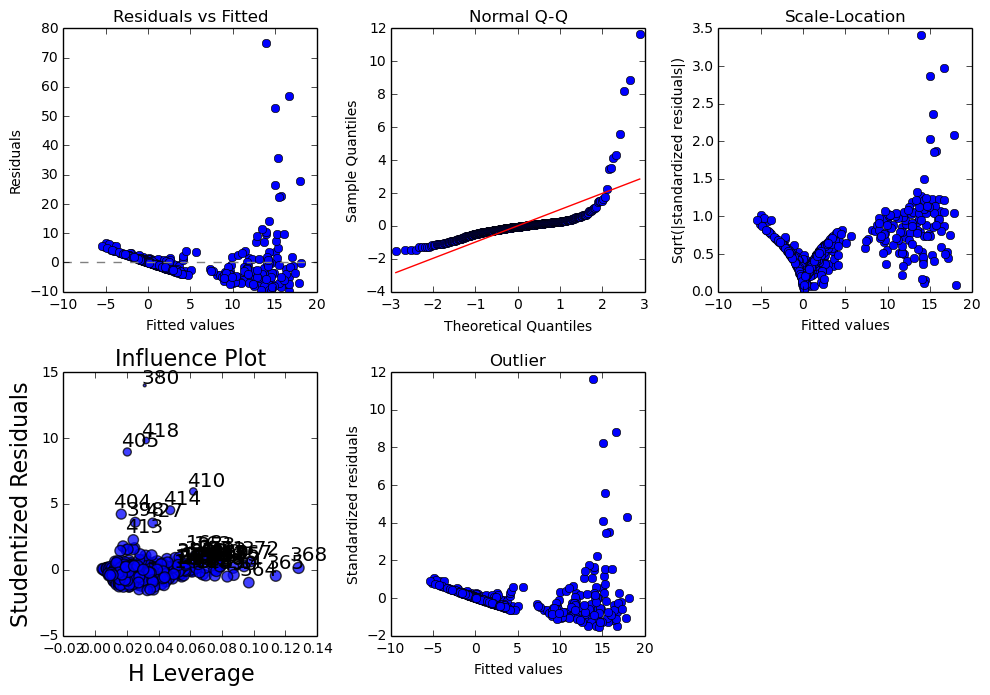

In [126]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [128]:
#Remove outliers to get correct p values.
data = data[abs(results['std_resids']) < 3 ]

data.reset_index(drop=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [129]:

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ ZN  + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     96.70
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          2.30e-125
Time:                        22:12:14   Log-Likelihood:                -1197.6
No. Observations:                 498   AIC:                             2423.
Df Residuals:                     484   BIC:                             2482.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6618      3.101      1.826      0.069      -0.432      11.756
C(CHAS)[T.1]    -0.7089      0.498     -1.423      0.155      -1.688       0.270
ZN               0.0251      0.008      3.174      0.002       0.010       0.041
INDUS           -0.0402      0.035     -1.140      0.255      -0.109       0.029
NOX             -3.4159      2.239     -1.526      0.128      -7.815       0.983
RM              -0.1679      0.262     -0.640      0.523      -0.684       0.348
AGE             -0.0020      0.008     -0.261      0.794      -0.017       0.013
DIS             -0.4636      0.120     -3.876      0.000      -0.699      -0.229
RAD              0.4385      0.037     11.745      0.000       0.365       0.512
TAX             -0.0012      0.002     -0.539      0.590      -0.005       0.003
PT              -0.1180      0.079     -1.497      0.135      -0.273       0.037
B               -0.0023      0.002     -1.404      0.161      -0.006       0.001
LSTAT            0.1756      0.033      5.353      0.000       0.111       0.240
MV              -0.0276      0.026     -1.062      0.289      -0.079       0.023
==============================================================================
Omnibus:                      266.337   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2531.362
Skew:                           2.140   Prob(JB):                         0.00
Kurtosis:                      13.182   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

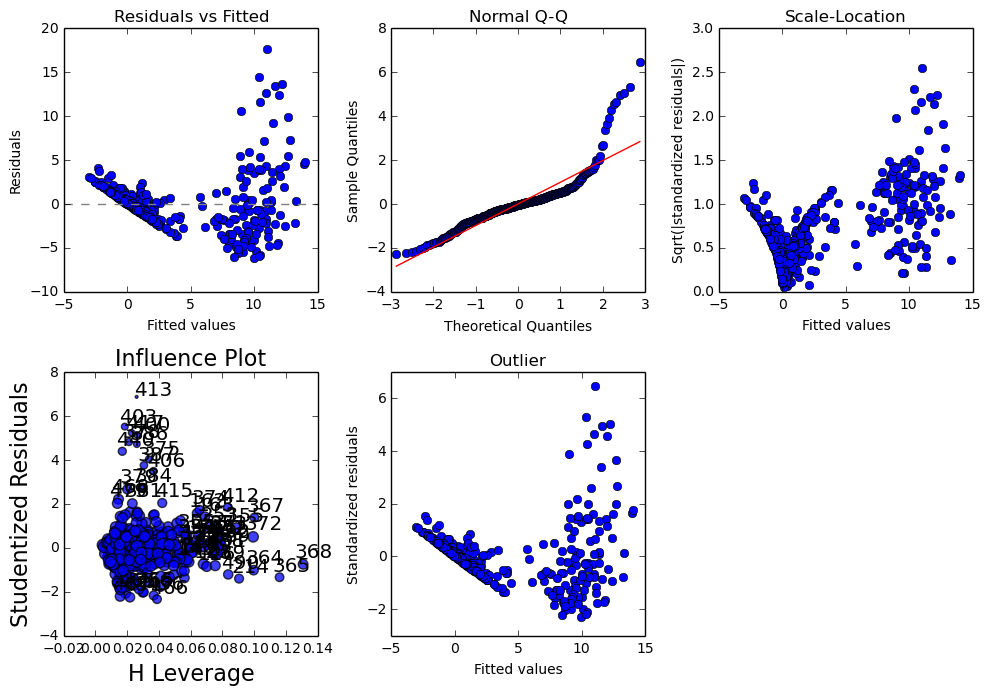

In [130]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [132]:
#Remove even more outliers to get correct p values.
data = data[abs(results['std_resids']) < 3 ]

data.reset_index(drop=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [133]:

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ ZN  + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          9.41e-153
Time:                        22:15:09   Log-Likelihood:                -1000.1
No. Observations:                 488   AIC:                             2028.
Df Residuals:                     474   BIC:                             2087.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8026      2.204      1.271      0.204      -1.529       7.134
C(CHAS)[T.1]    -0.5225      0.349     -1.495      0.136      -1.209       0.164
ZN               0.0165      0.006      2.955      0.003       0.006       0.027
INDUS           -0.0194      0.025     -0.783      0.434      -0.068       0.029
NOX             -1.5580      1.579     -0.987      0.324      -4.660       1.544
RM              -0.0181      0.190     -0.095      0.924      -0.392       0.355
AGE             -0.0016      0.005     -0.300      0.764      -0.012       0.009
DIS             -0.2767      0.084     -3.281      0.001      -0.442      -0.111
RAD              0.3630      0.026     13.745      0.000       0.311       0.415
TAX             -0.0005      0.002     -0.329      0.742      -0.004       0.002
PT              -0.0617      0.055     -1.115      0.265      -0.170       0.047
B               -0.0054      0.001     -4.540      0.000      -0.008      -0.003
LSTAT            0.1443      0.023      6.198      0.000       0.099       0.190
MV              -0.0010      0.019     -0.055      0.956      -0.037       0.035
==============================================================================
Omnibus:                      125.101   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.654
Skew:                           1.073   Prob(JB):                    1.08e-117
Kurtosis:                       7.678   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

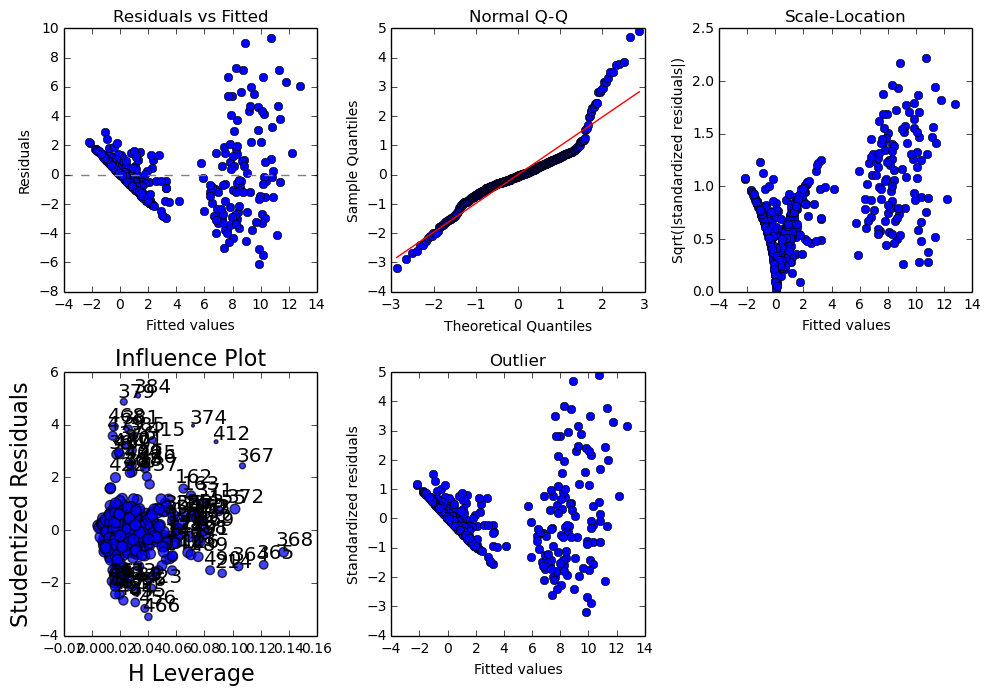

In [134]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [135]:
#Create same model with important features

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ ZN + DIS + RAD + B + LSTAT', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     362.1
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          1.20e-160
Time:                        22:17:41   Log-Likelihood:                -1003.9
No. Observations:                 488   AIC:                             2020.
Df Residuals:                     482   BIC:                             2045.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1345      0.587      0.229      0.819      -1.019       1.288
ZN             0.0187      0.005      3.777      0.000       0.009       0.028
DIS           -0.1921      0.060     -3.189      0.002      -0.310      -0.074
RAD            0.3396      0.013     26.642      0.000       0.315       0.365
B             -0.0054      0.001     -4.734      0.000      -0.008      -0.003
LSTAT          0.1318      0.015      8.506      0.000       0.101       0.162
==============================================================================
Omnibus:                      135.380   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.773
Skew:                           1.143   Prob(JB):                    1.07e-137
Kurtosis:                       8.079   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
#Study invidual predictions for non-linearity

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ ZN + np.power(ZN, 2) + np.power(ZN, 3)', data=data).fit()

# print the coefficients
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           6.15e-12
Time:                        22:30:59   Log-Likelihood:                -1356.6
No. Observations:                 488   AIC:                             2721.
Df Residuals:                     484   BIC:                             2738.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1739      0.208     15.290      0.000       2.766       3.582
ZN                 -0.2114      0.051     -4.108      0.000      -0.313      -0.110
np.power(ZN, 2)     0.0041      0.002      2.258      0.024       0.001       0.008
np.power(ZN, 3) -2.362e-05   1.47e-05     -1.609      0.108   -5.25e-05    5.23e-06
==============================================================================
Omnibus:                      184.634   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.310
Skew:                           1.875   Prob(JB):                    2.32e-114
Kurtosis:                       6.418   Cond. No.                     1.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:

# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ AGE + np.power(AGE, 2) + np.power(AGE, 3)', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     59.68
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           7.63e-33
Time:                        22:32:11   Log-Likelihood:                -1307.6
No. Observations:                 488   AIC:                             2623.
Df Residuals:                     484   BIC:                             2640.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1731      1.256     -0.934      0.351      -3.641       1.295
AGE                  0.1292      0.085      1.521      0.129      -0.038       0.296
np.power(AGE, 2)    -0.0034      0.002     -2.023      0.044      -0.007    -9.6e-05
np.power(AGE, 3)   2.81e-05    9.7e-06      2.897      0.004    9.04e-06    4.72e-05
==============================================================================
Omnibus:                      152.078   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.085
Skew:                           1.535   Prob(JB):                     6.60e-89
Kurtosis:                       6.247   Cond. No.                     4.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
#Create same model with important features
#Remove non constant variance by a squashing function

# create a fitted model in one line
lm = smf.ols(formula='np.sqrt(CRIM) ~ DIS + RAD + B + np.power(DIS, 2)  ', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(CRIM)   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     862.6
Date:                Sun, 06 Nov 2016   Prob (F-statistic):          2.34e-218
Time:                        22:52:55   Log-Likelihood:                -232.64
No. Observations:                 488   AIC:                             475.3
Df Residuals:                     483   BIC:                             496.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6445      0.124     13.300      0.000       1.402       1.887
DIS                 -0.3528      0.037     -9.497      0.000      -0.426      -0.280
RAD                  0.0960      0.003     36.281      0.000       0.091       0.101
B                   -0.0016      0.000     -6.954      0.000      -0.002      -0.001
np.power(DIS, 2)     0.0251      0.004      7.147      0.000       0.018       0.032
==============================================================================
Omnibus:                       39.122   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.792
Skew:                           0.563   Prob(JB):                     6.30e-14
Kurtosis:                       4.313   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

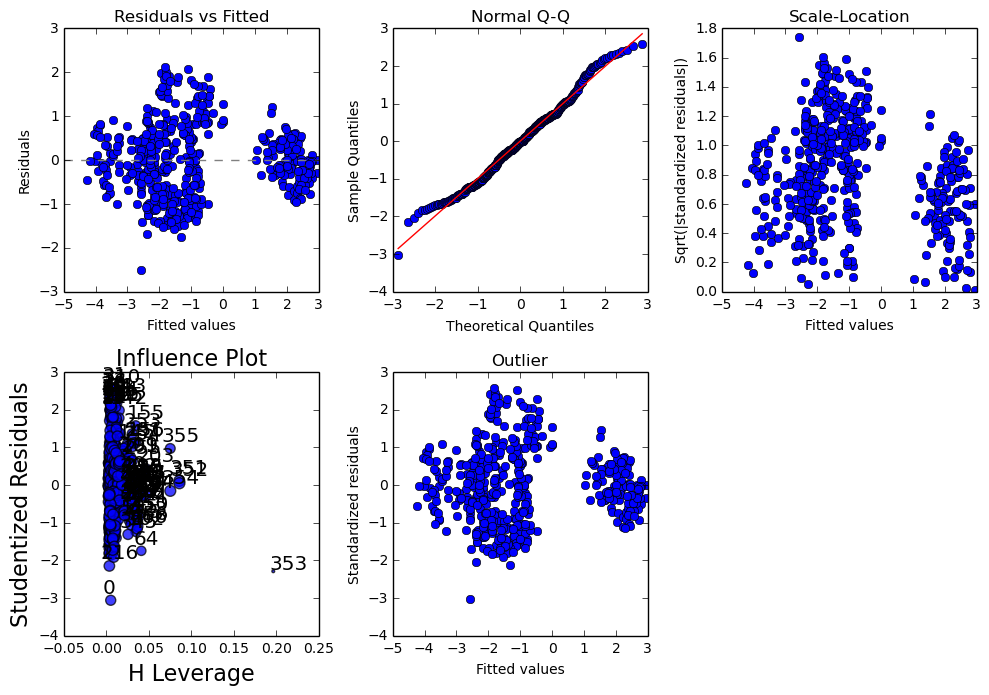

In [185]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [189]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
